### plot behavioural results

In [2]:
import os, sys
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

In [3]:
sns.set_style("whitegrid")

In [4]:
df = pd.read_csv('../data/fmri_behavioural_new.csv')

In [5]:
dfna = df.dropna(subset=['obs_p1g2', 'obs_p2g1'], how='all')

In [6]:
dfna.head()

,subject,session,trial,seq,rt,gen_p1g2,gen_p2g1,prob_pxl,prob_obs,obs_p1g2,obs_p2g1,obs_p1g1,obs_p2g2,obs_p1,obs_p2,obs_p,runtime
21,6,1,22,2,5.318199,0.75,0.40,690.0,0.800000,0.2,NaN,NaN,0.8,0.200000,0.800000,0.200000,40.25
42,6,1,43,1,4.738264,0.75,0.40,700.0,0.733333,NaN,0.266667,0.733333,NaN,0.733333,0.266667,0.266667,78.90
60,6,1,61,1,4.147888,0.75,0.40,755.0,0.366667,NaN,0.633333,0.366667,NaN,0.366667,0.633333,0.633333,112.80
79,6,1,80,2,3.889652,0.35,0.85,735.0,0.500000,0.5,NaN,NaN,0.5,0.500000,0.500000,0.500000,148.20
98,6,1,99,2,3.973970,0.35,0.85,690.0,0.800000,0.2,NaN,NaN,0.8,0.200000,0.800000,0.200000,183.55


In [7]:
dfna['gen_p1g1'] = 1 - dfna['gen_p2g1']
dfna['gen_p2g2'] = 1 - dfna['gen_p1g2']
dfna['gen_p1'] = (dfna['gen_p1g1'] + dfna['gen_p1g2'])/(dfna['gen_p1g1'] + dfna['gen_p1g2']+dfna['gen_p2g1'] + dfna['gen_p2g2'])
dfna['gen_p2'] = (dfna['gen_p2g1'] + dfna['gen_p2g2'])/(dfna['gen_p1g1'] + dfna['gen_p1g2']+dfna['gen_p2g1'] + dfna['gen_p2g2'])

<ipython-input-7-b84b32298ab8>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfna['gen_p1g1'] = 1 - dfna['gen_p2g1']
<ipython-input-7-b84b32298ab8>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfna['gen_p2g2'] = 1 - dfna['gen_p1g2']
<ipython-input-7-b84b32298ab8>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_g

In [8]:
dfna.head()

,subject,session,trial,seq,rt,gen_p1g2,gen_p2g1,prob_pxl,prob_obs,obs_p1g2,...,obs_p1g1,obs_p2g2,obs_p1,obs_p2,obs_p,runtime,gen_p1g1,gen_p2g2,gen_p1,gen_p2
21,6,1,22,2,5.318199,0.75,0.40,690.0,0.800000,0.2,...,NaN,0.8,0.200000,0.800000,0.200000,40.25,0.60,0.25,0.675,0.325
42,6,1,43,1,4.738264,0.75,0.40,700.0,0.733333,NaN,...,0.733333,NaN,0.733333,0.266667,0.266667,78.90,0.60,0.25,0.675,0.325
60,6,1,61,1,4.147888,0.75,0.40,755.0,0.366667,NaN,...,0.366667,NaN,0.366667,0.633333,0.633333,112.80,0.60,0.25,0.675,0.325
79,6,1,80,2,3.889652,0.35,0.85,735.0,0.500000,0.5,...,NaN,0.5,0.500000,0.500000,0.500000,148.20,0.15,0.65,0.250,0.750
98,6,1,99,2,3.973970,0.35,0.85,690.0,0.800000,0.2,...,NaN,0.8,0.200000,0.800000,0.200000,183.55,0.15,0.65,0.250,0.750


In [9]:
dfna.shape

(2104, 21)

#### original plots of transitions

In [10]:
dfm1 = dfna[['gen_p1g2', 'obs_p1g2','subject']].dropna()
dfm11 = dfm1.groupby(['subject']).transform(lambda x: (x - x.mean()) / x.std())
dfm11['subject'] = dfm1['subject']
dfm11['Generative p(L|H)'] = dfm11['gen_p1g2']
dfm11['Rated p(L|H)'] = dfm11['obs_p1g2']
stats.pearsonr(dfm11['Generative p(L|H)'], dfm11['Rated p(L|H)'])

(0.13139930964025168, 3.58951054847559e-05)

In [11]:
dfm1 = dfna[['gen_p2g2', 'obs_p2g2','subject']].dropna()
dfm11 = dfm1.groupby(['subject']).transform(lambda x: (x - x.mean()) / x.std())
dfm11['subject'] = dfm1['subject']
dfm11['Generative p(H|H)'] = dfm11['gen_p2g2']
dfm11['Rated p(H|H)'] = dfm11['obs_p2g2']
stats.pearsonr(dfm11['Generative p(H|H)'], dfm11['Rated p(H|H)'])

(0.13139930964025162, 3.589510548475801e-05)

In [12]:
dfm2 = dfna[['gen_p2g1', 'obs_p2g1', 'subject']].dropna()
dfm22 = dfm2.groupby(['subject']).transform(lambda x: (x - x.mean()) / x.std())
dfm22['subject'] = dfm2['subject']
dfm22['Generative p(H|L)'] = dfm22['gen_p2g1']
dfm22['Rated p(H|L)'] = dfm22['obs_p2g1']
stats.pearsonr(dfm22['Generative p(H|L)'], dfm22['Rated p(H|L)'])

(0.11870391715736259, 6.775759665809192e-05)

In [13]:
dfm11_r = dfm11.groupby('subject').apply(lambda x: stats.pearsonr(x['Generative p(H|H)'], x['Rated p(H|H)'])[0])

In [14]:
dfm22_r = dfm22.groupby('subject').apply(lambda x: stats.pearsonr(x['Generative p(H|L)'], x['Rated p(H|L)'])[0])

In [15]:
dfm_sj = pd.DataFrame({'P(H|H)': dfm11_r, 'P(H|L)': dfm22_r})

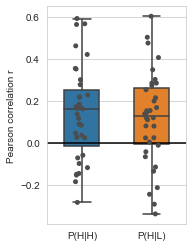

In [16]:
plt.subplots(figsize=(2.5,4))
g = sns.boxplot(data=dfm_sj, width=0.5)
g = sns.stripplot(data=dfm_sj, color='.3')
plt.axhline(0, color='k')
plt.ylabel('Pearson correlation r')
plt.savefig('./figs/genobs_pcorr.png', bbox_inches='tight')

In [17]:
dfm_sj.agg(['mean', 'std'])

,P(H|H),P(H|L)
mean,0.138441,0.117388
std,0.224694,0.220710


In [18]:
stats.ttest_1samp(dfm_sj, 0)

Ttest_1sampResult(statistic=array([3.64507447, 3.14656053]), pvalue=array([0.00088388, 0.00342618]))

In [19]:
(dfm_sj>0).sum()/35

P(H|H)    0.742857
P(H|L)    0.742857
dtype: float64

##### plot sample trials

In [20]:
df_gm = pd.read_csv('../data/fmri_behavioural_new.csv')
df_gm['gen_p1g1'] = 1 - df_gm['gen_p2g1']
df_gm['gen_p2g2'] = 1 - df_gm['gen_p1g2']
df_gm['gen_p1'] = (df_gm['gen_p1g1'] + df_gm['gen_p1g2'])/(df_gm['gen_p1g1'] + df_gm['gen_p1g2']+df_gm['gen_p2g1'] + df_gm['gen_p2g2'])
df_gm['gen_p2'] = (df_gm['gen_p2g1'] + df_gm['gen_p2g2'])/(df_gm['gen_p1g1'] + df_gm['gen_p1g2']+df_gm['gen_p2g1'] + df_gm['gen_p2g2'])

In [21]:
def plot_data(df, order=0):
    """plot trials"""
    fig, ax1 = plt.subplots(figsize=(12,2.5))
    lw, s = 3, 50
    seq = df['seq']-1
    x = np.arange(len(seq))

    plt.plot(x, df['gen_p2g1'], c='C1', lw=lw, alpha=.5, label='Generative p(H)')
    plt.plot(x, df['gen_p1g2'], c='C0', lw=lw, alpha=.5)

    plt.scatter(x[seq==1], seq[seq==1], s=s, c='C1', lw=lw)
    plt.scatter(x[seq==0], seq[seq==0], s=s, c='C0', lw=lw)

    plt.scatter(x, df['obs_p2g1'], s=s+60, lw=lw, marker='*',c='C1', alpha=0.8, label='Rated probability p(H|L)')
    plt.scatter(x, df['obs_p1g2'], s=s+60, lw=lw, marker='*',c='C0', alpha=0.8, label='Rated probability p(L|H)')

    plt.ylim([seq.min()-.5,seq.max()+.5])
    plt.xlim([x.min()-2, x.max()+2])
    plt.yticks([0,1], ['Low','High'])
    plt.xlabel('Trial')
    plt.ylabel('Stimulation')
    
    ax2 = ax1.twinx()
    ax2.set_yticks([0,0.5,1])
    ax2.set_ylabel('Generative probability')

    import matplotlib.lines as mlines
    yellow_star = mlines.Line2D([], [], color='C1', marker='*', alpha=0.7, markersize=15, label='Rated p(H|L)')
    yellow_line = mlines.Line2D([], [], color='C1', alpha=0.7, lw=lw, label='True p(H|L)')    
    yellow_dot = mlines.Line2D([], [], color='C1', marker='.', markersize=20, label='High pain trials')

    blue_star = mlines.Line2D([], [], color='C0', marker='*', alpha=0.7, markersize=15, label='Rated p(L|H)')
    blue_line = mlines.Line2D([], [], color='C0', alpha=0.7, lw=lw, label='True p(L|H)')    
    blue_dot = mlines.Line2D([], [], color='C0', marker='.', markersize=20, label='Low pain trials')


    plt.legend(handles=[yellow_star, blue_star, yellow_line, blue_line, yellow_dot, blue_dot],
               fontsize=12, loc=(1.1, .05))
    
    # draw change point arrow
    textstr = '\n'.join(('Change point', "'jump'"))
    plt.text(22, 1.15, textstr, fontsize=14, va='top', ha='center')
    plt.text(61, 1.15, textstr, fontsize=14, va='top', ha='center')
    
    import matplotlib.patches as mpatches
    x_tail = 21
    y_tail = 0.9
    x_head = x_tail
    y_head = 0.6
    arrow1 = mpatches.FancyArrowPatch((x_tail, y_tail), (x_head, y_head),
                                 mutation_scale=20)
    arrow2 = mpatches.FancyArrowPatch((x_tail+39, y_tail), (x_head+39, y_head),
                                 mutation_scale=20)
    ax2.add_patch(arrow1)
    ax2.add_patch(arrow2)

    plt.tight_layout()
    plt.savefig('./figs/behav_example.png', bbox_inches='tight')

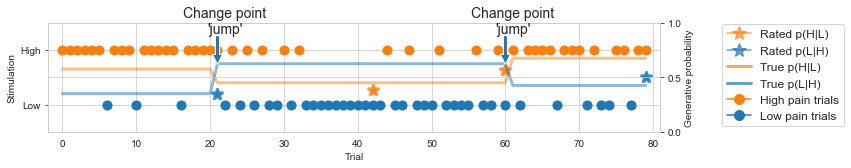

In [22]:
plot_data(df_gm.iloc[:80], order=0)

#### plotting jump awareness

In [6]:
df_gm = pd.read_csv('../data/fmri_behavioural_new.csv')
df_gm['gen_p1g1'] = 1 - df_gm['gen_p2g1']
df_gm['gen_p2g2'] = 1 - df_gm['gen_p1g2']
df_gm['gen_p1'] = (df_gm['gen_p1g1'] + df_gm['gen_p1g2'])/(df_gm['gen_p1g1'] + df_gm['gen_p1g2']+df_gm['gen_p2g1'] + df_gm['gen_p2g2'])
df_gm['gen_p2'] = (df_gm['gen_p2g1'] + df_gm['gen_p2g2'])/(df_gm['gen_p1g1'] + df_gm['gen_p1g2']+df_gm['gen_p2g1'] + df_gm['gen_p2g2'])

In [7]:
df_gm.shape

(44200, 21)

In [8]:
dff = df_gm[df_gm['subject']==6]

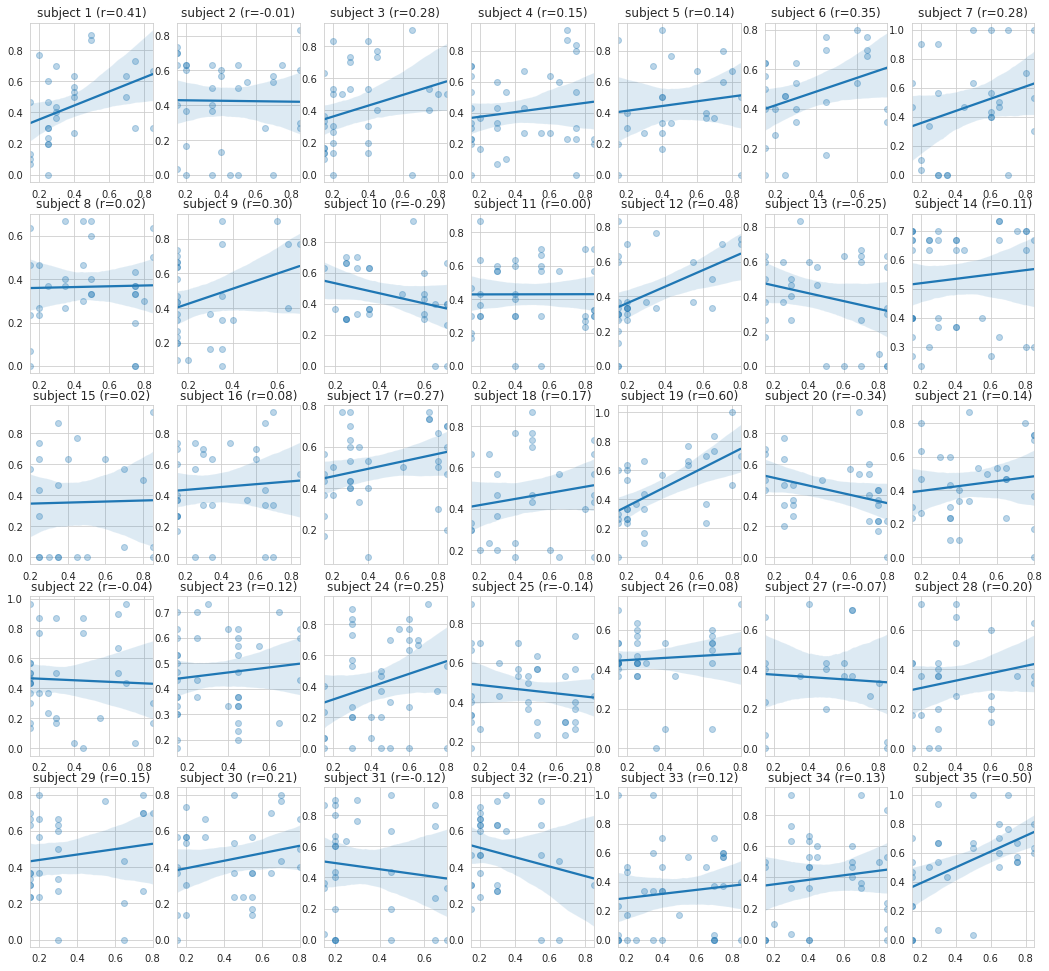

In [21]:
fig, axes = plt.subplots(5,7, figsize=(18,17))
sj_ls = np.unique(df_gm['subject'])
r_ls = []
for i, ax in zip(range(len(sj_ls)), axes.flat):
# for i, n in enumerate(np.unique(df_gm['subject'])):
    dff = df_gm[df_gm['subject']==sj_ls[i]].dropna(subset=['obs_p2g1'])
#     print(dff.shape)
    sns.regplot(ax=ax, data=dff, x='gen_p2g1', y='obs_p2g1',scatter_kws={'alpha':0.3})
    r,p = stats.pearsonr(dff['gen_p2g1'], dff['obs_p2g1'])
    r_ls.append(r)
    ax.set_title(f'subject {i+1} (r={r:.2f})')
    ax.set_xlabel('')
    ax.set_ylabel('')

In [24]:
r_phgl = r_ls
print(sum(np.array(r_phgl)>0)/len(r_phgl))

0.7428571428571429


In [25]:
np.mean(r_phgl)

0.11738825362721182

In [26]:
np.std(r_phgl)

0.217534432383563

In [19]:
fig.savefig('./figs/gen_obs_reg_individuals_phgl.png', bbox_inches='tight')

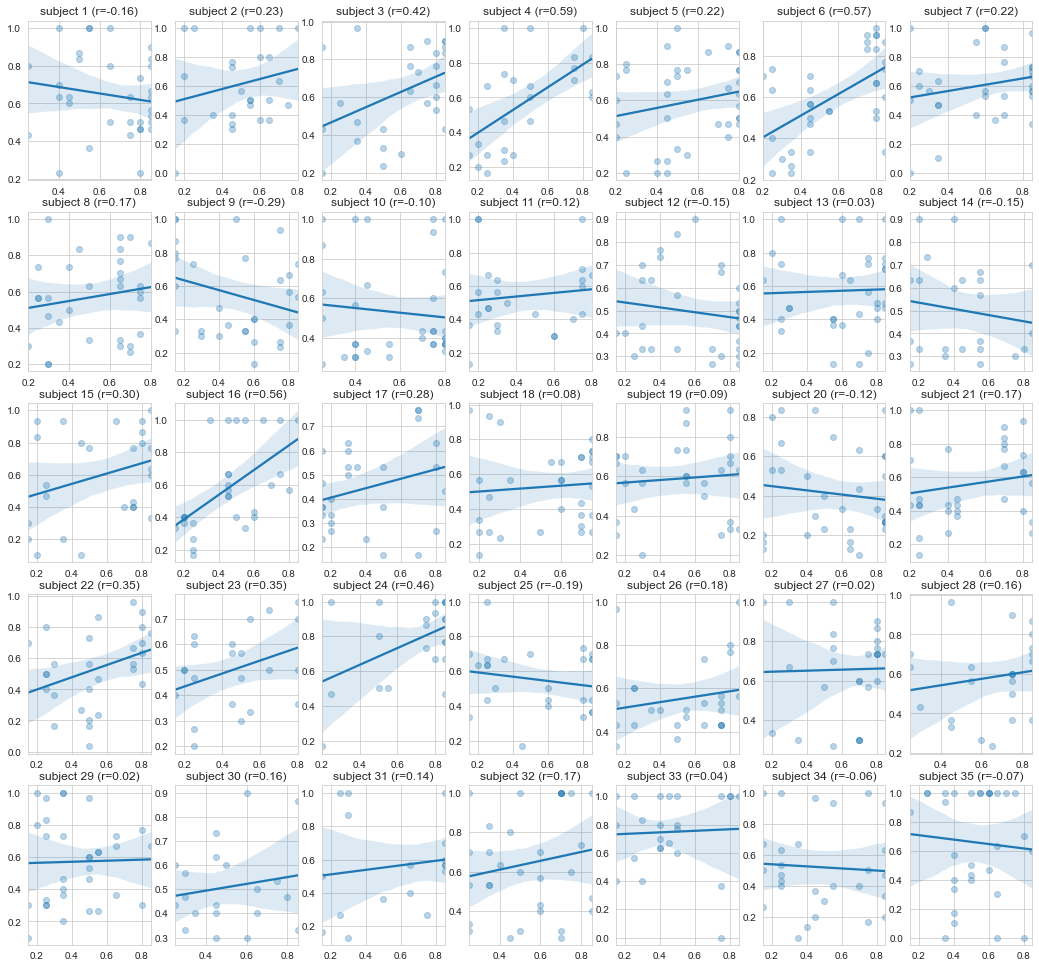

In [26]:
fig, axes = plt.subplots(5,7, figsize=(18,17))
sj_ls = np.unique(df_gm['subject'])
r_ls = []
for i, ax in zip(range(len(sj_ls)), axes.flat):
# for i, n in enumerate(np.unique(df_gm['subject'])):
    dff = df_gm[df_gm['subject']==sj_ls[i]].dropna(subset=['obs_p2g2'])
#     print(dff.shape)
    sns.regplot(ax=ax, data=dff, x='gen_p2g2', y='obs_p2g2',scatter_kws={'alpha':0.3})
    r,p = stats.pearsonr(dff['gen_p2g2'], dff['obs_p2g2'])
    r_ls.append(r)
    ax.set_title(f'subject {i+1} (r={r:.2f})')
    ax.set_xlabel('')
    ax.set_ylabel('')
#     sns.jointplot(ax=ax, data=dff, x='gen_p1', y='obs_p1', kind='reg', 
#                   scatter_kws={'alpha':0.3})#color="#4CB391", 
#     plt.clf()


In [27]:
r_plgh = r_ls
print(sum(np.array(r_plgh)>0)/len(r_plgh))

0.7428571428571429


In [28]:
np.mean(r_plgh)

0.1384405678679933

In [29]:
np.std(r_plgh)

0.2214605761588202

In [31]:
fig.savefig('./figs/gen_obs_reg_individuals_phgh.png', bbox_inches='tight')

#### plotting example subject

In [11]:
df_gm = pd.read_csv('../data/fmri_behavioural_new.csv')
df_gm['gen_p1g1'] = 1 - df_gm['gen_p2g1']
df_gm['gen_p2g2'] = 1 - df_gm['gen_p1g2']
df_gm['gen_p1'] = (df_gm['gen_p1g1'] + df_gm['gen_p1g2'])/(df_gm['gen_p1g1'] + df_gm['gen_p1g2']+df_gm['gen_p2g1'] + df_gm['gen_p2g2'])
df_gm['gen_p2'] = (df_gm['gen_p2g1'] + df_gm['gen_p2g2'])/(df_gm['gen_p1g1'] + df_gm['gen_p1g2']+df_gm['gen_p2g1'] + df_gm['gen_p2g2'])

0.5674805832543918 0.000465118172682181
0.34802285180901205 0.07525693075081037


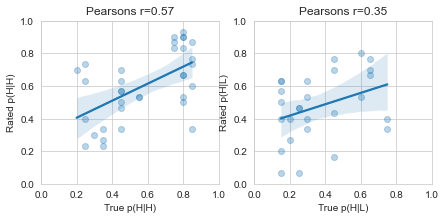

In [17]:
fig, ax = plt.subplots(1,2, figsize=(7,3.))
sj_ls = np.unique(df_gm['subject'])
dff = df_gm[df_gm['subject']==sj_ls[5]]#.dropna(subset=['obs_p1g2', 'obs_p2g1'])
sns.regplot(ax=ax[0], data=dff, x='gen_p2g2', y='obs_p2g2',scatter_kws={'alpha':0.3})
sns.regplot(ax=ax[1], data=dff, x='gen_p2g1', y='obs_p2g1',scatter_kws={'alpha':0.3})
dff_p1g2 = dff.dropna(subset=['obs_p1g2'])
dff_p2g1 = dff.dropna(subset=['obs_p2g1'])
r_p1g2,p = stats.pearsonr(dff_p1g2['gen_p1g2'], dff_p1g2['obs_p1g2'])
print(r_p1g2, p)
r_p2g1,p = stats.pearsonr(dff_p2g1['gen_p2g1'], dff_p2g1['obs_p2g1'])
print(r_p2g1, p)

ax[0].set(xlim=(0,1), ylim=(0,1), xlabel='True p(H|H)', ylabel='Rated p(H|H)', title=f'Pearsons r={r_p1g2:.2f}')
ax[1].set(xlim=(0,1), ylim=(0,1), xlabel='True p(H|L)', ylabel='Rated p(H|L)', title=f'Pearsons r={r_p2g1:.2f}')

fig.savefig('./figs/gen_obs_example_sj.png', bbox_inches='tight')

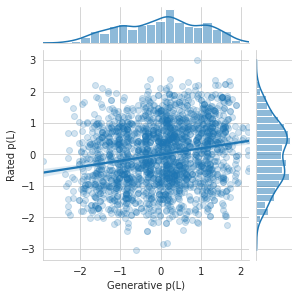

In [14]:
g = sns.jointplot(data=dfm11, x='Generative p(L)', y='Rated p(L)', kind='reg', 
                  scatter_kws={'alpha':0.2})#color="#4CB391", 
g.fig.set_figwidth(4)
g.fig.set_figheight(4)
plt.savefig('./figs/p1_genrate.png', bbox_inches='tight')

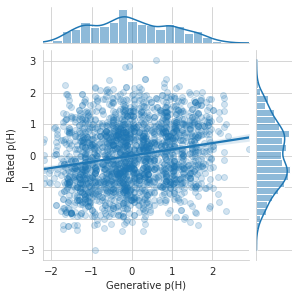

In [17]:
g = sns.jointplot(data=dfm22, x='Generative p(H)', y='Rated p(H)', kind='reg'
                 , scatter_kws={'alpha':0.2})#color="#4CB391", 
g.fig.set_figwidth(4)
g.fig.set_figheight(4)
plt.savefig('./figs/p2_genrate.png', bbox_inches='tight')

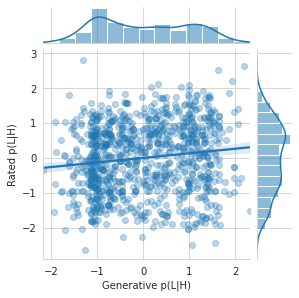

In [14]:
g = sns.jointplot(data=dfm11, x='Generative p(L|H)', y='Rated p(L|H)', kind='reg', 
                  scatter_kws={'alpha':0.3})#color="#4CB391", 
g.fig.set_figwidth(4)
g.fig.set_figheight(4)
plt.savefig('./figs/p1g2.png', bbox_inches='tight')

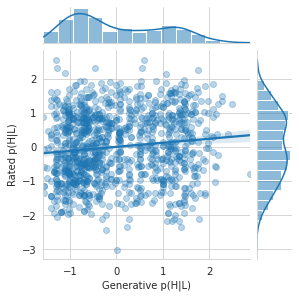

In [17]:
g = sns.jointplot(data=dfm22, x='Generative p(H|L)', y='Rated p(H|L)', kind='reg'
                 , scatter_kws={'alpha':0.3})#color="#4CB391", 
g.fig.set_figwidth(4)
g.fig.set_figheight(4)
plt.savefig('./figs/p2g1.png', bbox_inches='tight')

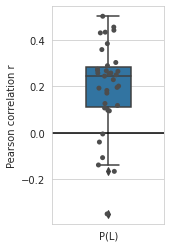

In [34]:
plt.subplots(figsize=(2,4))
g = sns.boxplot(data=dfm_sj, width=0.4)
# g = sns.violinplot(data=dfm_sj, width=0.5)
g = sns.stripplot(data=dfm_sj, color='.3')
plt.axhline(0, color='k')
plt.ylabel('Pearson correlation r')
plt.savefig('./figs/genobs_pcorr_lh.png', bbox_inches='tight')